In [2]:
import pandas as pd
df1=pd.read_csv(r"C:\Users\Technical\Downloads\internet_data.csv")
df2=pd.read_csv(r"C:\Users\Technical\Downloads\customer_data.csv")
df3=pd.read_csv(r"C:\Users\Technical\Downloads\churn_data.csv")

In [3]:
merge_df1_df2=pd.merge(df1,df2,on='customerID',how='inner')

df=pd.merge(merge_df1_df2,df3,on='customerID',how='inner')

In [4]:
df.columns

Index(['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.drop(['customerID','Contract'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MultipleLines     7043 non-null   object 
 1   InternetService   7043 non-null   object 
 2   OnlineSecurity    7043 non-null   object 
 3   OnlineBackup      7043 non-null   object 
 4   DeviceProtection  7043 non-null   object 
 5   TechSupport       7043 non-null   object 
 6   StreamingTV       7043 non-null   object 
 7   StreamingMovies   7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  tenure            7043 non-null   int64  
 13  PhoneService      7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [7]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [8]:
df.isnull().sum()

MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<Axes: >

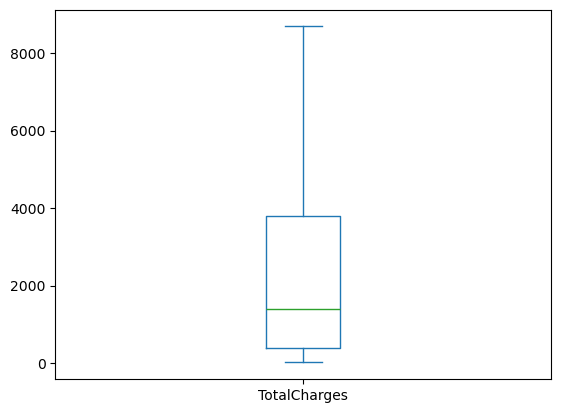

In [9]:
df['TotalCharges'].plot(kind='box')

In [10]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [11]:
for i in df.select_dtypes(include='object').columns:
  print(df[i].unique())

['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['No' 'Yes']


In [12]:
df

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No phone service,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,1,No,Yes,Electronic check,29.85,29.85,No
1,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,34,Yes,No,Mailed check,56.95,1889.50,No
2,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,2,Yes,Yes,Mailed check,53.85,108.15,Yes
3,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,45,No,No,Bank transfer (automatic),42.30,1840.75,No
4,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No,2,Yes,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes,24,Yes,Yes,Mailed check,84.80,1990.50,No
7039,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,72,Yes,Yes,Credit card (automatic),103.20,7362.90,No
7040,No phone service,DSL,Yes,No,No,No,No,No,Female,0,Yes,Yes,11,No,Yes,Electronic check,29.60,346.45,No
7041,Yes,Fiber optic,No,No,No,No,No,No,Male,1,Yes,No,4,Yes,Yes,Mailed check,74.40,306.60,Yes


In [13]:
df.groupby('PaymentMethod')[['MonthlyCharges','TotalCharges']].sum()

,MonthlyCharges,TotalCharges
PaymentMethod,,
Bank transfer (automatic),103745.45,4.752847e+06
Credit card (automatic),101231.85,4.673877e+06
Electronic check,180345.00,4.944903e+06
Mailed check,70794.30,1.709659e+06


In [14]:
df=df.loc[df['PaymentMethod']!='Mailed check',:]

<Axes: xlabel='Churn'>

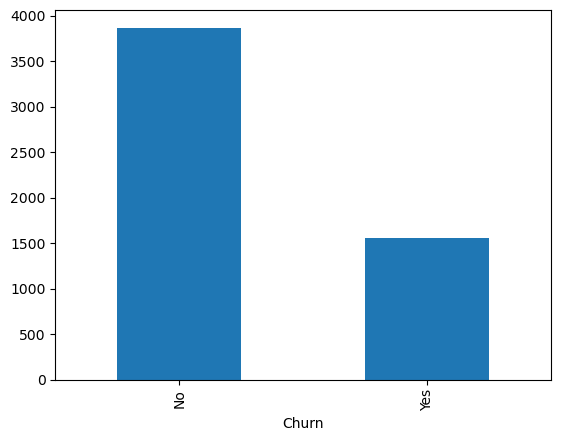

In [15]:
df['Churn'].value_counts().plot(kind='bar')

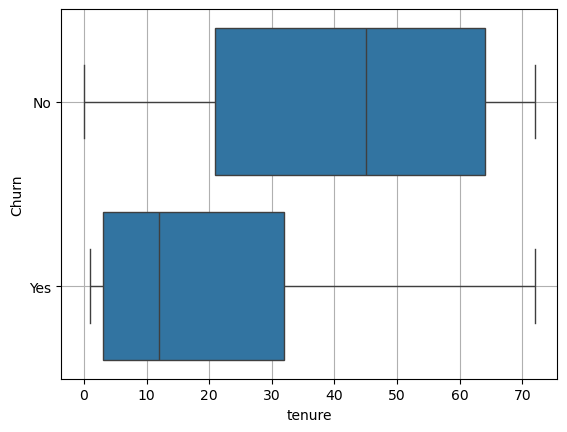

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='tenure',y='Churn',data=df)
plt.grid()

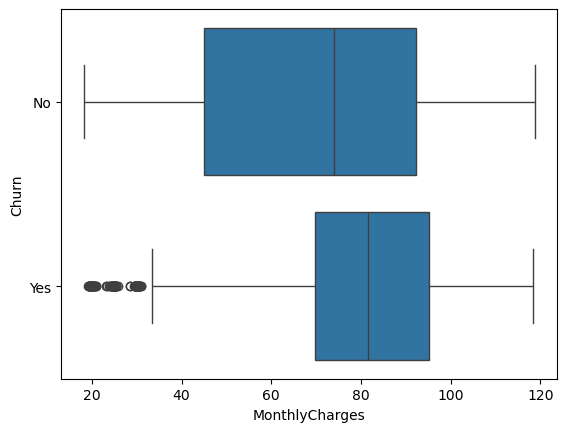

In [17]:
sns.boxplot(y='Churn',x='MonthlyCharges',data=df)
plt.show()

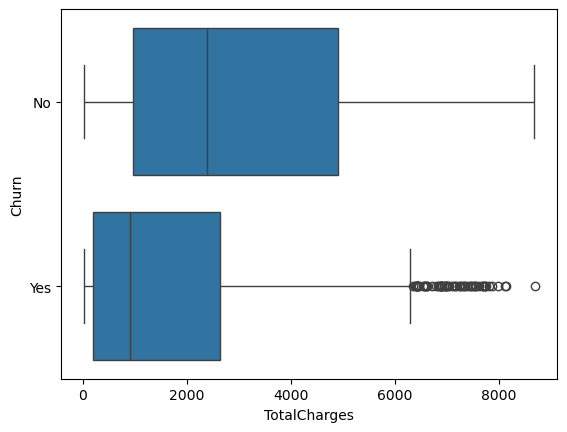

In [18]:
sns.boxplot(y='Churn',x='TotalCharges',data=df)
plt.show()

In [19]:
q1=df['TotalCharges'].quantile(0.25)
q3=df['TotalCharges'].quantile(0.75)
iqr=q3-q1
lower= q1-1.5*iqr
upper= q3+1.5*iqr

mean_value=df[(df['TotalCharges']>lower )& (df['TotalCharges']<upper)]['TotalCharges'].mean()
print(mean_value)
df.loc[:, 'TotalCharges'] = df['TotalCharges'].apply(lambda x: mean_value if x < lower or x > upper else x
)

2646.221027678609


In [24]:
upper

np.float64(10029.5)

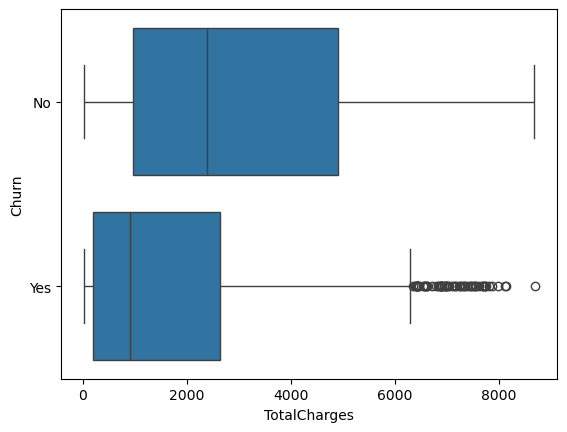

In [25]:
sns.boxplot(y='Churn',x='TotalCharges',data=df)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2ebdcac7890>,
 'caps': [<matplotlib.lines.Line2D at 0x2ebdcac7b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ebdcac7750>],
 'medians': [<matplotlib.lines.Line2D at 0x2ebdcac7d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ebdcac7ed0>],
 'means': []}

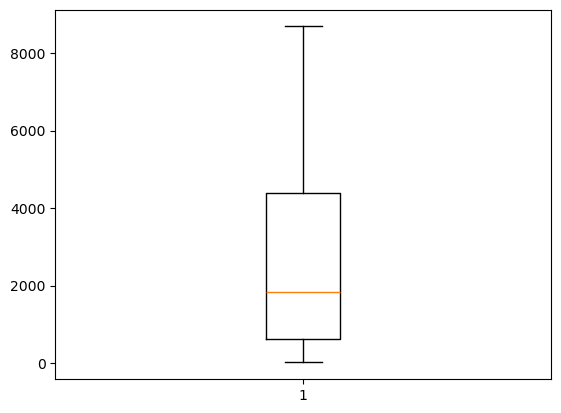

In [26]:
plt.boxplot(df['TotalCharges'])

<Axes: xlabel='tenure', ylabel='Churn'>

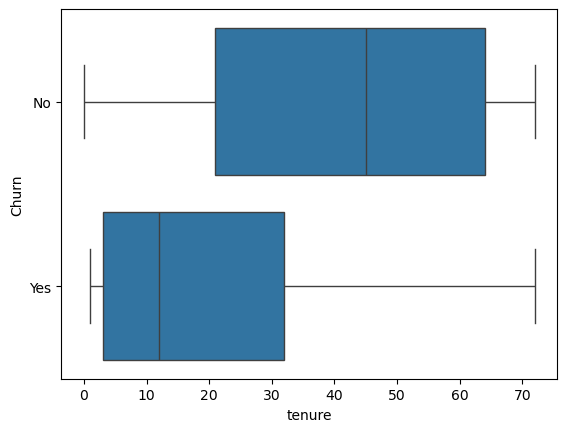

In [27]:
sns.boxplot(x='tenure',y='Churn',data=df)

In [28]:
df

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No phone service,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,1,No,Yes,Electronic check,29.85,29.85,No
3,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,45,No,No,Bank transfer (automatic),42.30,1840.75,No
4,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No,2,Yes,Yes,Electronic check,70.70,151.65,Yes
5,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Female,0,No,No,8,Yes,Yes,Electronic check,99.65,820.50,Yes
6,Yes,Fiber optic,No,Yes,No,No,Yes,No,Male,0,No,Yes,22,Yes,Yes,Credit card (automatic),89.10,1949.40,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Female,0,No,No,12,No,No,Electronic check,60.65,743.30,No
7037,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Female,0,No,No,72,Yes,Yes,Bank transfer (automatic),21.15,1419.40,No
7039,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,72,Yes,Yes,Credit card (automatic),103.20,7362.90,No
7040,No phone service,DSL,Yes,No,No,No,No,No,Female,0,Yes,Yes,11,No,Yes,Electronic check,29.60,346.45,No


In [29]:
var_list=['PhoneService','PaperlessBilling','Churn','Partner','Dependents']

def binary_map(x):
  return x.map({'Yes':1,'No':0})

In [30]:
df[var_list]=df[var_list].apply(binary_map)

C:\Users\Technical\AppData\Local\Temp\ipykernel_17944\2849506329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var_list]=df[var_list].apply(binary_map)


In [31]:
col=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'gender', 'PaymentMethod']
df_dummies=pd.get_dummies(df[col],dtype=int,drop_first=True)

In [32]:
telecom=pd.concat([df,df_dummies],axis=1)

In [33]:
telecom.drop(col,axis=1,inplace=True)

In [34]:
telecom.loc[5]

SeniorCitizen                              0.00
Partner                                    0.00
Dependents                                 0.00
tenure                                     8.00
PhoneService                               1.00
PaperlessBilling                           1.00
MonthlyCharges                            99.65
TotalCharges                             820.50
Churn                                      1.00
MultipleLines_No phone service             0.00
MultipleLines_Yes                          1.00
InternetService_Fiber optic                1.00
InternetService_No                         0.00
OnlineSecurity_No internet service         0.00
OnlineSecurity_Yes                         0.00
OnlineBackup_No internet service           0.00
OnlineBackup_Yes                           0.00
DeviceProtection_No internet service       0.00
DeviceProtection_Yes                       1.00
TechSupport_No internet service            0.00
TechSupport_Yes                         

In [35]:
telecom.duplicated().sum()

np.int64(6)

In [36]:
telecom.drop_duplicates(inplace=True)

In [37]:
x=telecom[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'gender_Male', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check']]

In [38]:
y=telecom['Churn']

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test=train_test_split(x,y, train_size=0.7,random_state=100)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges']])

In [41]:
x_train

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,gender_Male,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
416,0,1,0,1.387613,1,1,0.959848,1.759680,0,1,...,1,0,1,0,0,0,1,1,0,0
5525,0,1,1,0.738325,1,1,-1.640150,-0.571616,0,1,...,0,1,0,1,0,1,0,0,0,0
2848,0,1,1,-0.479089,1,1,-0.532646,-0.524245,0,0,...,1,0,0,0,0,0,0,1,1,0
909,0,0,0,1.428193,1,1,1.401092,2.235194,0,1,...,1,0,1,0,1,0,1,0,0,1
3274,0,0,0,-0.073284,1,1,1.184865,0.397223,0,0,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5371,0,0,0,0.738325,1,1,1.144432,1.244190,0,1,...,1,0,0,0,1,0,1,0,0,0
2397,0,0,0,-1.412440,1,1,0.595954,-1.101454,0,0,...,0,0,0,0,1,0,1,1,0,1
453,0,1,1,-0.316767,1,1,0.339294,-0.197650,0,0,...,0,0,0,0,0,0,1,0,0,1
98,0,0,0,0.657164,1,0,-1.771996,-0.670903,0,0,...,0,1,0,1,0,1,0,1,0,0


In [42]:
cor=telecom.corr()

In [43]:
cor

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,gender_Male,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
SeniorCitizen,1.000000,-0.000410,-0.225074,-0.020969,0.014142,0.136425,0.180158,0.059725,0.135201,-0.014142,...,0.029387,-0.150694,-0.089097,-0.150694,0.072585,-0.150694,0.092566,0.005080,-0.075622,0.129762
Partner,-0.000410,1.000000,0.431879,0.377193,0.008077,-0.028795,0.074523,0.318449,-0.161669,-0.008077,...,0.141392,0.027302,0.119766,0.027302,0.109534,0.027302,0.104830,0.014158,0.064470,-0.147938
Dependents,-0.225074,0.431879,1.000000,0.179856,-0.003957,-0.104154,-0.096920,0.092572,-0.165611,0.003957,...,0.026184,0.125510,0.085316,0.125510,-0.004869,0.125510,-0.021135,0.013825,0.092678,-0.159522
tenure,-0.020969,0.377193,0.179856,1.000000,0.001915,-0.052051,0.180725,0.828247,-0.400127,-0.001915,...,0.352232,0.055756,0.330337,0.055756,0.239873,0.055756,0.248309,0.013451,0.196264,-0.367347
PhoneService,0.014142,0.008077,-0.003957,0.001915,1.000000,0.020104,0.317435,0.131217,0.019213,-1.000000,...,-0.053147,0.134351,-0.064692,0.134351,-0.021822,0.134351,-0.036461,-0.006208,-0.010107,0.001790
PaperlessBilling,0.136425,-0.028795,-0.104154,-0.052051,0.020104,1.000000,0.304809,0.106548,0.179048,-0.020104,...,0.061787,-0.273988,-0.009231,-0.273988,0.194366,-0.273988,0.175978,-0.001974,-0.088206,0.163949
MonthlyCharges,0.180158,0.074523,-0.096920,0.180725,0.317435,0.304809,1.000000,0.618028,0.166955,-0.317435,...,0.444881,-0.719091,0.293048,-0.719091,0.594307,-0.719091,0.593668,-0.007574,-0.097948,0.165028
TotalCharges,0.059725,0.318449,0.092572,0.828247,0.131217,0.106548,0.618028,1.000000,-0.247979,-0.131217,...,0.505446,-0.316417,0.425490,-0.316417,0.474316,-0.316417,0.480426,0.008876,0.112741,-0.207639
Churn,0.135201,-0.161669,-0.165611,-0.400127,0.019213,0.179048,0.166955,-0.247979,1.000000,-0.019213,...,-0.102518,-0.212060,-0.198634,-0.212060,0.036428,-0.212060,0.039770,-0.008215,-0.185334,0.319731
MultipleLines_No phone service,-0.014142,-0.008077,0.003957,-0.001915,-1.000000,-0.020104,-0.317435,-0.131217,-0.019213,1.000000,...,0.053147,-0.134351,0.064692,-0.134351,0.021822,-0.134351,0.036461,0.006208,0.010107,-0.001790


In [44]:
correlated_feature=set()
for i in range(len(cor.columns)):
  for j in range(i):
    if abs(cor.iloc[i,j])>0.7:
      column1=cor.columns[i]
      column2=cor.columns[j]
      print(abs(cor.iloc[i,j]),"    ",i, "     ",j,"    ", column1, "    ", column2)

      correlated_feature.add(column1)
      correlated_feature.add(column2)

0.8282469746310626      7       3      TotalCharges      tenure
0.9999999999999999      9       4      MultipleLines_No phone service      PhoneService
0.7765525119365854      11       6      InternetService_Fiber optic      MonthlyCharges
0.7190905786989259      12       6      InternetService_No      MonthlyCharges
0.7190905786989259      13       6      OnlineSecurity_No internet service      MonthlyCharges
1.0      13       12      OnlineSecurity_No internet service      InternetService_No
0.7190905786989259      15       6      OnlineBackup_No internet service      MonthlyCharges
1.0      15       12      OnlineBackup_No internet service      InternetService_No
1.0      15       13      OnlineBackup_No internet service      OnlineSecurity_No internet service
0.7190905786989259      17       6      DeviceProtection_No internet service      MonthlyCharges
1.0      17       12      DeviceProtection_No internet service      InternetService_No
1.0      17       13      DeviceProtection

In [45]:
correlated_feature=list(correlated_feature)

In [46]:
x_train.drop(correlated_feature,axis=1, inplace=True)

In [47]:
x_test.drop(correlated_feature,axis=1, inplace=True)

In [48]:
from statsmodels.tools import add_constant as add
x_train_add=add(x_train)
x_test_add=add(x_test)

x_train_add

,const,SeniorCitizen,Partner,Dependents,PaperlessBilling,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,gender_Male,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
416,1.0,0,1,0,1,1,0,1,1,1,0,1,1,0,0
5525,1.0,0,1,1,1,1,0,0,0,0,0,0,0,0,0
2848,1.0,0,1,1,1,0,1,0,1,0,0,0,1,1,0
909,1.0,0,0,0,1,1,0,1,1,1,1,1,0,0,1
3274,1.0,0,0,0,1,0,0,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5371,1.0,0,0,0,1,1,1,0,1,0,1,1,0,0,0
2397,1.0,0,0,0,1,0,0,0,0,0,1,1,1,0,1
453,1.0,0,1,1,1,0,0,0,0,0,0,1,0,0,1
98,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [49]:
import statsmodels.api as stat

In [50]:
col = x_train_add.columns

In [51]:
model = stat.Logit(y_train,x_train_add).fit()

Optimization terminated successfully.
         Current function value: 0.502128
         Iterations 6


In [52]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 3797
Model:                          Logit   Df Residuals:                     3782
Method:                           MLE   Df Model:                           14
Date:                Sat, 21 Feb 2026   Pseudo R-squ.:                  0.1520
Time:                        14:50:21   Log-Likelihood:                -1906.6
converged:                       True   LL-Null:                       -2248.5
Covariance Type:            nonrobust   LLR p-value:                7.585e-137
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3333      0.125    -10.705      0.000      -1.577      -1.089
SeniorCitizen                             0.2998  

In [53]:
x_train_add.drop(['gender_Male','PaymentMethod_Credit card (automatic)','MultipleLines_Yes'],axis=1,inplace=True)

In [54]:
model1=stat.Logit(y_train,x_train_add).fit()
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.502447
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 3797
Model:                          Logit   Df Residuals:                     3785
Method:                           MLE   Df Model:                           11
Date:                Sat, 21 Feb 2026   Pseudo R-squ.:                  0.1515
Time:                        14:51:44   Log-Likelihood:                -1907.8
converged:                       True   LL-Null:                       -2248.5
Covariance Type:            nonrobust   LLR p-value:                5.426e-139
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.3843      0.100    -13.882     

In [55]:
x_train = x_train_add.drop('const',axis=1)

In [56]:
x_train.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaymentMethod_Electronic check'],
      dtype='object')

In [57]:
x_train.loc[416]

SeniorCitizen                     0
Partner                           1
Dependents                        0
PaperlessBilling                  1
OnlineSecurity_Yes                0
OnlineBackup_Yes                  1
DeviceProtection_Yes              1
TechSupport_Yes                   1
StreamingTV_Yes                   0
StreamingMovies_Yes               1
PaymentMethod_Electronic check    0
Name: 416, dtype: int64

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [59]:
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [60]:
x_test = x_test[['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaymentMethod_Electronic check']]

In [61]:
pred_y = lr.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

In [63]:
print(confusion_matrix(y_test,pred_y))

[[1041   92]
 [ 297  198]]


In [64]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      1133
           1       0.68      0.40      0.50       495

    accuracy                           0.76      1628
   macro avg       0.73      0.66      0.67      1628
weighted avg       0.75      0.76      0.74      1628



In [65]:
pred_prob_y = lr.predict_proba(x_test)[:,1]

In [66]:
print(roc_auc_score(y_test,pred_prob_y))

0.7766000695391693


In [67]:
fpr, tpr , thre = roc_curve(y_test,pred_prob_y)

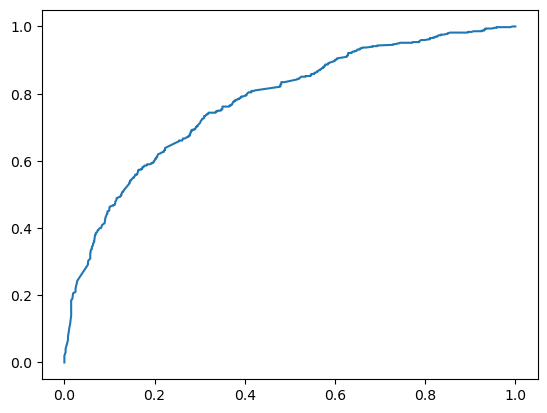

In [68]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)

In [69]:
y_train_proba = pd.DataFrame({'churn':y_test, 'pred_prob_churn':pred_prob_y})
y_train_proba

,churn,pred_prob_churn
5206,0,0.034489
2942,0,0.417445
6397,0,0.138518
6723,0,0.200894
6299,0,0.215461
...,...,...
5698,1,0.237630
2893,1,0.216685
482,0,0.698417
2608,1,0.153962


In [70]:
import numpy as np
rand_thre = np.arange(0,1,0.1)
rand_thre

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [71]:
for i in rand_thre:
    y_train_proba[i] = y_train_proba.pred_prob_churn.map(lambda x : 1 if x>i else 0)

In [72]:
cutoff_thr = pd.DataFrame(columns=['prob','accuracy','sensi','speci','precision'])
from sklearn.metrics import confusion_matrix
for i in rand_thre:
    cm=confusion_matrix(y_train_proba['churn'],y_train_proba[i])
    total = sum((sum(cm)))
    accu = (cm[0,0]+cm[1,1])/total
    sensi = cm[0,0]/(cm[0,0]+cm[1,0])
    speci = cm[1,1]/(cm[1,1]+cm[0,1])
    preci = cm[0,0]/(cm[0,0]+cm[0,1])

    cutoff_thr.loc[i] = [i,accu,sensi,speci,preci]

C:\Users\Technical\AppData\Local\Temp\ipykernel_17944\1070372948.py:7: RuntimeWarning: invalid value encountered in scalar divide
  sensi = cm[0,0]/(cm[0,0]+cm[1,0])
C:\Users\Technical\AppData\Local\Temp\ipykernel_17944\1070372948.py:8: RuntimeWarning: invalid value encountered in scalar divide
  speci = cm[1,1]/(cm[1,1]+cm[0,1])
C:\Users\Technical\AppData\Local\Temp\ipykernel_17944\1070372948.py:8: RuntimeWarning: invalid value encountered in scalar divide
  speci = cm[1,1]/(cm[1,1]+cm[0,1])


<Axes: xlabel='prob'>

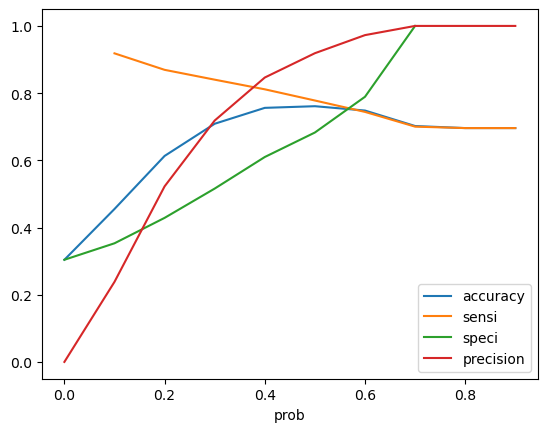

In [73]:
cutoff_thr.plot.line(x='prob', y =['accuracy','sensi','speci','precision'])

<Axes: xlabel='prob'>

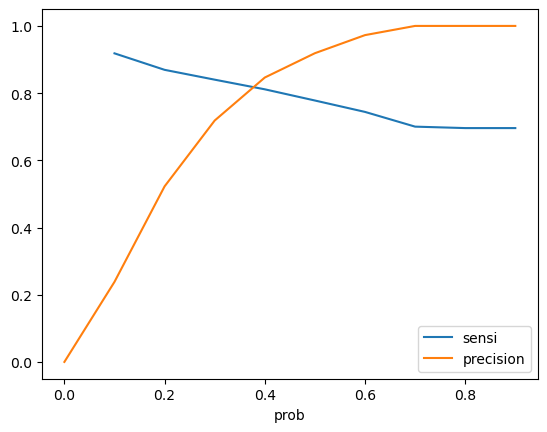

In [74]:
cutoff_thr.plot.line(x = 'prob' , y = ['sensi','precision'])  ## precison recall trade off

In [75]:
for i in rand_thre:
    y_train_proba['y_predicted'] = y_train_proba.pred_prob_churn.map(lambda x : 1 if x>0.4 else 0)

In [76]:
y_train_proba

,churn,pred_prob_churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,y_predicted
5206,0,0.034489,1,0,0,0,0,0,0,0,0,0,0
2942,0,0.417445,1,1,1,1,1,0,0,0,0,0,1
6397,0,0.138518,1,1,0,0,0,0,0,0,0,0,0
6723,0,0.200894,1,1,1,0,0,0,0,0,0,0,0
6299,0,0.215461,1,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5698,1,0.237630,1,1,1,0,0,0,0,0,0,0,0
2893,1,0.216685,1,1,1,0,0,0,0,0,0,0,0
482,0,0.698417,1,1,1,1,1,1,1,0,0,0,1
2608,1,0.153962,1,1,0,0,0,0,0,0,0,0,0


In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
param = {
    'C': [0.01,0.1,1,10],
    'penalty' : ['l1','l2'],
    'solver' :['liblinear'], # libnear supports l1 and l2
    'max_iter' : [100,200,300]
}
n = 10
model = GridSearchCV(lr,param_grid = param, cv = n,scoring='accuracy')

In [79]:
model.fit(x_train,y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [0.01, 0.1, ...], 'max_iter': [100, 200, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [80]:
best_parameter = model.best_params_
best_parameter

{'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [81]:
lr1 = LogisticRegression(**best_parameter)

In [82]:
lr1.fit(x_train,y_train)

,penalty,'l1'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [83]:
pred = lr1.predict(x_test)

In [84]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      1133
           1       0.68      0.41      0.51       495

    accuracy                           0.76      1628
   macro avg       0.73      0.66      0.68      1628
weighted avg       0.75      0.76      0.74      1628



In [85]:
confusion_matrix(y_test,pred)

array([[1039,   94],
       [ 294,  201]])

In [86]:
import pickle as pkl
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
with open('customer_churn.pkl','wb') as file:
    pkl.dump(lr1,file)

In [88]:
import streamlit as st